In [3]:
import dask
from dask.distributed import Client, wait
from dask import delayed

client = Client(n_workers=7, threads_per_worker=1) 
#client = Client()

client

/g/data/xp65/public/apps/med_conda/envs/analysis3-24.12/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34493 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/34493/status,
Dashboard: /proxy/34493/status,Workers: 7
Total threads: 7,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39033,Workers: 7
Dashboard: /proxy/34493/status,Total threads: 7
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:41857,Total threads: 1
Dashboard: /proxy/37129/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:41193,


In [17]:
#import all the stuff
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append("/g/data/mn51/users/nb6195/project/gwls/")
import gwl

In [18]:
#Set parameters
CMIP='CMIP6'
#AGENCY = 'CSIRO' 
#RCM = 'CCAM-v2203-SN'
AGENCY = 'BOM' 
RCM = 'BARPA-R'

#GCM = 'ACCESS-CM2' #ensemble = 'r4i1p1f1' #Done
#GCM = 'ACCESS-ESM1-5' #ensemble = 'r6i1p1f1' #Done
#GCM = 'EC-Earth3' ensemble = 'r1i1p1f1' #Done
#GCM = 'MPI-ESM1-2-HR' ensemble = 'r1i1p1f1' #BOM done, no CSIRO
GCM = 'CESM2' 
ensemble = 'r11i1p1f1' #Done
#GCM = 'CMCC-ESM2' ensemble = 'r1i1p1f1' #Done
#GCM = 'NorESM2-MM' ensemble = 'r1i1p1f1' #Done
#GCM = 'CNRM-ESM2-1' ensemble = 'r1i1p1f2' #CSIRO Done, no BOM

#pathway = 'ssp126'
pathway = 'ssp370'

ddir = f"/g/data/kj66/CORDEX/output/{CMIP}/DD/AUST-05i/{AGENCY}/{GCM}"
output_dir = '/g/data/ia39/ncra/bushfire/dwi/'
#output_dir_mm = '/g/data/ia39/ncra/bushfire/dwi/monthly_mean/'

In [19]:
infiles12=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.2_dwi.nc"
dwi_data_12 = xr.open_dataset(infiles12)['__xarray_dataarray_variable__']
infiles15=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.5_dwi.nc"
dwi_data_15 = xr.open_dataset(infiles15)['__xarray_dataarray_variable__']
infiles20=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl2.0_dwi.nc"
dwi_data_20 = xr.open_dataset(infiles20)['__xarray_dataarray_variable__']
infiles30=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl3.0_dwi.nc"
dwi_data_30 = xr.open_dataset(infiles30)['__xarray_dataarray_variable__']

In [21]:
ff_infiles12=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.2_faux_ffdi.nc"
faux_data_12 = xr.open_dataset(ff_infiles12)['__xarray_dataarray_variable__']

In [22]:
pf_infiles12=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.2_p_ffdi.nc"
faux_data_12 = xr.open_dataset(pf_infiles12)['__xarray_dataarray_variable__']

In [23]:
faux_data_12

<xarray.DataArray '__xarray_dataarray_variable__' (time: 7300, lat: 691,
                                                   lon: 886)> Size: 18GB
[4469249800 values with dtype=float32]
Coordinates:
  * time     (time) object 58kB 2010-01-01 12:00:00 ... 2029-12-31 12:00:00
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Attributes: (12/14)
    creator_institution:    Bureau of Meteorology
    long_name:              Psudo FFDI computed from tasmax, hursmin, maximum...
    summary:                Fire weather metric: p_ffdi for Global Warming Le...
    institution:            Bureau of Meteorology
    program:                Australian Climate Service (ACS)
    standard_name:          p_ffdi
    ...                     ...
    creator_type:           institution
    naming_authority:       Bureau of Meteorology
    publisher_type:         group
    publisher_institution:  Bureau of Meteorology
    institute_id:           BOM
    publisher_url:          http://www.bom.gov.au

In [8]:
#conversion factor to FFDI from Kevin
#Psudo FFDI: (50/3)*(DF/10) matching FFDI for a particular event provided by Musa, 30 Sept 2023
#also computed for mean T humidity for Melb airport for Feb for total obs history at that time
#this removes the wind speed bias - FFDI undersensitive to wind and over sensitive to temp, 
#they often compensate. But not great on cool windy days
#Faux FFDI: (T + 12)(DF/10)/2 
s = 50/3

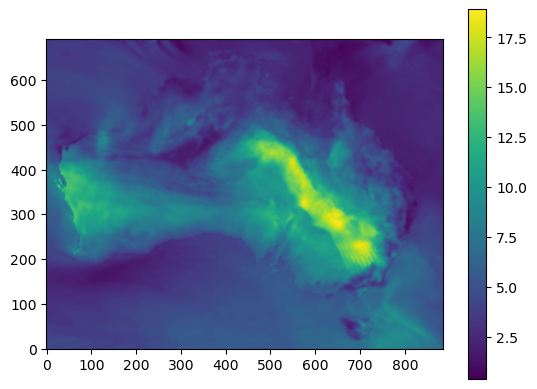

In [9]:
plt.imshow(s*dwi_data_30[5], origin='lower')
plt.colorbar()

In [10]:
P_FFDI = 50/3*dwi_data_30

In [16]:
dwi_data_30.standard_name

'dwi'

In [14]:
P_FFDI

<xarray.DataArray '__xarray_dataarray_variable__' (time: 7300, lat: 691,
                                                   lon: 886)> Size: 18GB
array([[[3.2420971 , 3.2390106 , 3.2359273 , ..., 4.6430736 ,
         4.6198206 , 4.605658  ],
        [3.220742  , 3.215224  , 3.211595  , ..., 4.7492166 ,
         4.7222075 , 4.703083  ],
        [3.2025607 , 3.1909292 , 3.1817381 , ..., 4.854545  ,
         4.827359  , 4.81226   ],
        ...,
        [2.0927885 , 2.0996394 , 2.106428  , ..., 2.093064  ,
         2.1045864 , 2.103925  ],
        [2.0834806 , 2.0902145 , 2.0940843 , ..., 2.08576   ,
         2.0934296 , 2.0962496 ],
        [2.0729392 , 2.0771315 , 2.0812745 , ..., 2.0756679 ,
         2.0857723 , 2.0888572 ]],

       [[4.4754386 , 4.483803  , 4.4930134 , ..., 3.6655002 ,
         3.6750028 , 3.6852043 ],
        [4.5071473 , 4.5100174 , 4.51577   , ..., 3.699743  ,
         3.713716  , 3.7251382 ],
        [4.582659  , 4.576587  , 4.568301  , ..., 3.7627873 ,
         3.7769349 , 3.7891247 ],
...
        [0.77743614, 0.77042115, 0.7658348 , ..., 2.1700497 ,
         2.1807857 , 2.1718004 ],
        [0.7907306 , 0.7847231 , 0.7760967 , ..., 2.1998808 ,
         2.2028596 , 2.183516  ],
        [0.8036089 , 0.796062  , 0.7883088 , ..., 2.2218049 ,
         2.217281  , 2.1881049 ]],

       [[2.3851497 , 2.3716831 , 2.3581748 , ..., 4.700894  ,
         4.707074  , 4.7126675 ],
        [2.3343573 , 2.3276002 , 2.3231812 , ..., 4.713169  ,
         4.7252507 , 4.7317405 ],
        [2.3063493 , 2.3088405 , 2.3092942 , ..., 4.70582   ,
         4.718038  , 4.7204514 ],
        ...,
        [1.3009568 , 1.3080037 , 1.3149583 , ..., 1.8153756 ,
         1.8287239 , 1.8514864 ],
        [1.2572746 , 1.2637645 , 1.2704135 , ..., 1.828741  ,
         1.8469055 , 1.8678019 ],
        [1.2129892 , 1.2194303 , 1.2255899 , ..., 1.848305  ,
         1.864931  , 1.8844665 ]]], dtype=float32)
Coordinates:
  * time     (time) object 58kB 2062-01-01 12:00:00 ... 2081-12-31 12:00:00
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2

In [6]:
#read in RCM files
var1 = 'tasmax'
infiles1a=glob.glob(ddir+f'/historical/{ensemble}/{RCM}/v1-r1/day/{var1}/v20241216//{var1}_AUST-05i_{GCM}_historical_{ensemble}_{AGENCY}_{RCM}_v1-r1_day_*.nc')
infiles1b=glob.glob(ddir+f'/{pathway}/{ensemble}/{RCM}/v1-r1/day/{var1}/v20241216/{var1}_AUST-05i_{GCM}_{pathway}_{ensemble}_{AGENCY}_{RCM}_v1-r1_day_*.nc')
tasmax_master_ds = xr.open_mfdataset(infiles1a + infiles1b)

In [7]:
chosen_gwl = '3.0'

gwl_tasmax = gwl.get_GWL_timeslice(tasmax_master_ds,CMIP,GCM,ensemble,pathway,GWL=chosen_gwl)[var1]

In [8]:
Faux_FFDI = (gwl_tasmax + 12)/2 *dwi_data_30

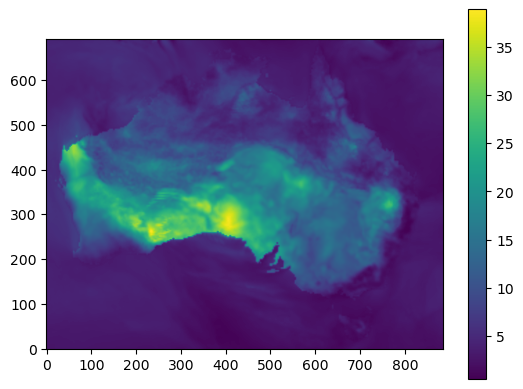

In [9]:
plt.imshow((gwl_tasmax[3] + 12)/2*dwi_data_30[3], origin='lower')
plt.colorbar()